In [1]:
import pandas as pd
points = pd.read_csv('data.csv') #import dataset 

In [2]:
x, y = points['hours'], points['grade']

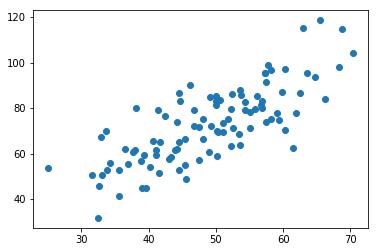

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt # import matplotlib for visualization

plt.scatter(x, y) # let's see how the data looks in scatter plot.
plt.show()

In [4]:
# The data looks pretty consistent. Students who studied more hours got higher marks.
# Let's try to find out the line of best fit.

# The line of best fit is a straight line that passes through the points with the least distance between each points.
# okay! It's pretty intuitive to me. But, how do we do teach this to computer?

# NOTE:equation of a straigh line is y = mx+c , where m = gradient and c = y-intercept.
# Step 1: Let's initialize m = 0 and c = 0 at first, so that initial line passes through  y = 0 i.e x-axis.
# Step 2: We will calculate the distance between the line and each point in the graph, and add that together error = sum(y-y')
# step 3: To make computation faster, we will square the differnece between points. error = 1/2M(sum((y-y')^2)).
# error = sum((y-y')^2). well, scientist call that Sum of Squared Error Function or Cost Function.

# We will repeat this process by changing the value of m and b over certain number so that we can get wide range of errors.
# But, how do we change the value of m and b? That's where Gradient Descent Comes into play.

In [5]:
def cost_function(m, c, x, y):
    error = 0
    for i in range(len(x)):
        new_y = m * x[i] + c
        error += (new_y - y[i]) ** 2
    actual_error = error / (2 * float(len(x)))
    return actual_error

In [6]:
def step_function(m, c, x, y, learning_rate):
    step_m = 0
    step_c = 0
    n = float(len(x))
    for i in range(0, len(x)):
        step_m += ((((m * x[i]) + c) - y[i]) * x[i]) / n  
        step_c += (((m * x[i]) + c) - y[i]) / n 
    new_m = m - (learning_rate * step_m)
    new_c = c - (learning_rate * step_c)
    return [new_m, new_c]

In [7]:
def gradient_descent(m, c, x, y, no_of_iterations):
    for i in range(no_of_iterations):
        m, c = step_function(m, c, x, y, 0.0001)
    return [m, c]

In [8]:
def show_graph(m, c):
    draw_line = [m * x[i] + c for i in range(len(x))]
    plt.ylabel("Grades")
    plt.xlabel("Hours Studied")
    plt.scatter(x,y)
    plt.plot(x, draw_line)
    plt.show()

In [11]:
def run():
    # initialize the parameters for m and c.
    initial_m = 0
    initial_c = 0
    
    # setting up hyper-parameters for gradient descent.
    no_of_iterations = 1000
    
    # lets see how it looks at first
    print("Initial m = {0}, Initial c = {1}, and the error is {2}.".format(initial_m, initial_c, cost_function(initial_m, initial_c, x, y)))
    
    # get the value after gradient descent is performed. This m and c is the optimal value where error is the least.
    [m, c] = gradient_descent(initial_m, initial_c, x, y, no_of_iterations)
    
    print("After {0} iterations, m = {1}, c = {2}, and the error is {3}.".format(no_of_iterations, m, c, cost_function(m, c, x, y)))
    
    show_graph(m, c)

Initial m = 0, Initial c = 0, and the error is 2782.553917241605.
After 1000 iterations, m = 1.4783313274545458, c = 0.0590585566421608, and the error is 56.316335393554716.


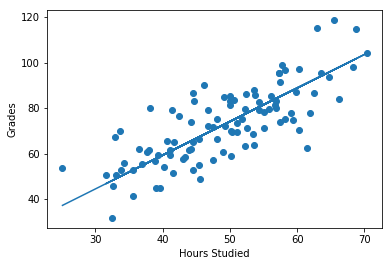

In [12]:
run()